# DSCI 563 Lab 1: Tensor manipulation & building Neural Networks

### Assignment Topics
* Introduction to Neural Nets, (Feed Forward-NNs / Multi-layer Perceptrons)
* Operations on tensor
* Linearities, non-linearities and loss functions

### Software Requirements
* Python (>=3.6)
* PyTorch (>=1.2.0)
* Jupyter (latest)
* Scikit Learn (>=0.23.2)
* Skorch (>=0.9)

## Getting started

Run the following code:

In [4]:
# Run this to import the required libraries 
import numpy as np
import torch
import torch.nn as nn
from sklearn.datasets import load_digits  
import matplotlib.pyplot as plt
import sklearn.metrics

# We'll use double values in our tensors
torch.set_default_dtype(torch.float64)

# Checks if GPU is available, otherwise use CPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
torch.backends.cudnn.deterministic=True
print(device)

cpu


## Tidy Submission
rubric={mechanics:1}

To get the marks for tidy submission:

* Submit the assignment by filling in this jupyter notebook with your answers embedded
* Be sure to follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions)

## Assignment 1

Short exercises with numpy arrays. You will create and manipulate arrays in various ways.

### Assignment 1.1
rubric={accuracy:1}

Create the following numpy arrays `a` and `b`. Compute their matrix product (`@` or `np.dot()`) and print the result.

```
a: [[1 3]
    [5 2]
    [8 3]]
    
b: [[0 1 0]
    [0 0 1]]
```

In [2]:
# your code here

# cheatsheet
print(a)
print(b)
print(a @ b)
print(np.dot(a, b))

[[1 3]
 [5 2]
 [8 3]]
[[0 1 0]
 [0 0 1]]
[[0 1 3]
 [0 5 2]
 [0 8 3]]
[[0 1 3]
 [0 5 2]
 [0 8 3]]


### Assignment 1.2
rubric={accuracy:1}

Create a numpy array `a`:

```
a: [[1 2]
    [3 4]]
```

Create a matrix `b` such that the matrix product of `a` and `b` is:

```
[[ 1  2 -2 -1]
 [ 3  4 -4 -3]]
```

In [39]:
# your code here
a = 
b = 
c = a@b

# cheatsheet
from numpy.linalg import inv
# b = (inverse of a) @ c
np.allclose(a@b,c)

True

### Assignment 1.3
rubric={accuracy:1}

Compute the Hadamard product of `a` with itself using numpy operations (`*` or `np.multiply()`):

```
a: [[1 2]
    [3 4]]
```

In [5]:
# Hadamard product = element-wise 
# Your code here

a = np.array([[1,2],[3,4]])


[[ 1  4]
 [ 9 16]]


array([[ 1,  4],
       [ 9, 16]])

### Assignment 1.4
rubric={acuracy:1}

Initialize a 3 x 3 array `a` with random floating point elements sampled uniformly from the range $[-2, 4]$. Print `a`. 

(There exist a few different ways to solve this assignment)

In [44]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
# random.uniform(low=0.0, high=1.0, size=None) where size = [3,3]


# https://numpy.org/doc/stable/reference/random/generated/numpy.random.random.html 
# Return random floats in the half-open interval [0.0, 1.0): 0.0 included and 1.0 exculed 
# x*0 + y = -2; x*1 + y = 4
# a = x * np.random.random((3,3)) - y

# print(a)

[[ 3.04529228  2.75583449  1.00301083]
 [ 3.30172844 -0.4739906  -0.44980771]
 [ 2.54719578  0.16255242  0.9045189 ]]


### Assignment 1.5
rubric={accuracy:2}

Compute the matrix product of the following matrices manually using loops. Check that your answer is correct by comparing to the matrix product compute by numpy.

```
a: [[0.  1.  0.5]
    [1.5 2.  0. ]]
    
b = [[1 1]
     [0 1],
     [1 0]]
```

In [7]:
a = np.array([[0,1,0.5],[1.5,2,0]])
b = np.array([[1,1],[0,1],[1,0]])

c = np.zeros((a.shape[0],b.shape[1]))

# your code here


# your code here
            
print(c)
print(a @ b)
(c == a@b).all()

[[0.5 1. ]
 [1.5 3.5]]
[[0.5 1. ]
 [1.5 3.5]]


True

## Assignment 2

Short exercises with pytoch arrays. You will create and manipulate arrays in various ways.

### Assignment 2.1
rubric={accuracy:1}

Choose all elements in the middle column of the following tensor:

In [47]:
x = torch.tensor([[0.5, 0.1, 2  ],
                  [1,   2,   3  ],
                  [-1,  0.2, 0.1]])
x

tensor([[ 0.5000,  0.1000,  2.0000],
        [ 1.0000,  2.0000,  3.0000],
        [-1.0000,  0.2000,  0.1000]])

```
                    |
                    V
tensor([[ 0.5000,  0.1000,  2.0000],
        [ 1.0000,  2.0000,  3.0000],        
        [-1.0000,  0.2000,  0.1000]])
```

In [46]:
# your code here


tensor([0.1000, 2.0000, 0.2000])


### Assignment 2.2
rubric={accuracy:1}

Choose all elements on the first and third row and in the second and third column of tensor `x`.

(Hint: The result will have four elements. It may be a good idea to do this in two steps)

```
                    |           |
                    V           V
tensor([[ 0.5000,  0.1000,  2.0000],            <-
        [ 1.0000,  2.0000,  3.0000],
        [-1.0000,  0.2000,  0.1000]])           <-
```

In [10]:
# your code here


tensor([[0.1000, 2.0000],
        [0.2000, 0.1000]])


### Assignment 2.3
rubric={accuracy:1}

Initialize a 2 x 3 x 4 tensor `s` and a 4 x 2 tensor `t`. Compute the product of `s` with `t`. Print the size of the tensor. It should be 2 x 3 x 2.

In [11]:
# https://pytorch.org/docs/stable/generated/torch.rand.html

print((s@t).size())

torch.Size([2, 3, 2])


### Assignment 2.4 
rubric={accuracy:1}

You are given the following tensors `s` and `t` of size 3:

In [48]:
s = torch.tensor([1,2,3])
t = torch.tensor([1,2,3])

If you compute the matrix product of `s` and `t`, you'll get a scalar, that is, tensor of size 1. However, there is another way to multiply two tensors of size 3 and get a tensor of size 3 x 3 as result.

First use the `unsqueeze` operation to transform `s` into a 3 x 1 tensor and `t` to a 1 x 3 tensor. Then compute the matrix product of `s` and `t`. Print the product tensor and its size.

tensor([[1],
        [2],
        [3]])
tensor([[1, 2, 3]])


![unsqueeze](unsqueeze.png)

In [13]:
u = 
print(u)
print(u.size())

tensor([[1, 2, 3],
        [2, 4, 6],
        [3, 6, 9]])
torch.Size([3, 3])


### Assignment 2.5
rubric={accuracy:2}

You are given the following tensor `t`:

In [52]:
t = torch.rand(3,3,4)

Transpose (`transpose`) axes 2 and 3 of `t` and save the result as t_tr. Check that `t[0,1,2] == t_tr[0,2,1]`.
https://pytorch.org/docs/stable/generated/torch.transpose.html

In [55]:
print(t)
t_tr = 
print(t_tr)

print(t.size())
print(t_tr.size())

tensor([[[0.7929, 0.2575, 0.6029, 0.1876],
         [0.8466, 0.4568, 0.7253, 0.7253],
         [0.3712, 0.9726, 0.1285, 0.5960]],

        [[0.7019, 0.2524, 0.7976, 0.9000],
         [0.0971, 0.1821, 0.3148, 0.3473],
         [0.4190, 0.4985, 0.2488, 0.6088]],

        [[0.0333, 0.1104, 0.8923, 0.9407],
         [0.9960, 0.3496, 0.1304, 0.4333],
         [0.8031, 0.6851, 0.4028, 0.1947]]])
tensor([[[0.7929, 0.8466, 0.3712],
         [0.2575, 0.4568, 0.9726],
         [0.6029, 0.7253, 0.1285],
         [0.1876, 0.7253, 0.5960]],

        [[0.7019, 0.0971, 0.4190],
         [0.2524, 0.1821, 0.4985],
         [0.7976, 0.3148, 0.2488],
         [0.9000, 0.3473, 0.6088]],

        [[0.0333, 0.9960, 0.8031],
         [0.1104, 0.3496, 0.6851],
         [0.8923, 0.1304, 0.4028],
         [0.9407, 0.4333, 0.1947]]])
torch.Size([3, 3, 4])
torch.Size([3, 4, 3])


In [56]:
assert(t[0,1,2] == t_tr[0,2,1])

## Assignment 3

In this final obligatory assignment, we'll build a pytorch multi-layer perceptron for digit classification. The digits we'll classify are simple 8-by-8 pixel grayscale images like the one below (representing the digit 0):

<img src="zero.png" alt="Zero" style="width: 100px;"/>

We will train neural networks to associate each picture with a digit label (0, 1, 2, 3, 4, 5, 6, 7 ,8 or 9).

### Assignment 3.1
rubric={accuracy:5, quality:1}

We'll start by reading a dataset of digit images and their gold standard digit labels. This dataset is the [Optical Recognition of Handwritten Digits Data Set](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) which is included in the sklearn library. 

1. First, use the **[`load_digits`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)** function from sklearn with argument **`return_X_y=True`** to read the data into a matrix `X` and vector `y` of shape 1787 x 64 and 1797, respectively. Print the shape of `X` and `y` to make sure that they are correct.

2. Then, use the pyplot **[`imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)** function to plot the ten first digits in `X` as **8 x 8 grayscale images** (`(8,8)` and `camp='gray'`). Before you plot an example `x`, you will need to call [`reshape()`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) to transform it from a 64-dimensional vector into an 8 x 8 image.

3. Finally, assign the 1000 first examples in `X` and `y` into a training set (`train_X` and `train_y`), the 400 following examples into a development set (`dev_X` and `dev_y`) and the final 397 examples into a test set (`test_X` and `test_y`). Because we're using pytorch models, you will need to transform every example in `train_X`, `dev_X` and `test_X` into a torch tensor. Do this using the command: 
    `torch.tensor([x])` for all elements in  `train_X`, `dev_X` and `test_X` 



(1797, 64)
(1797,)


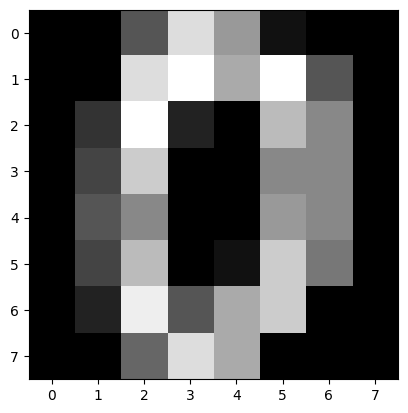

0


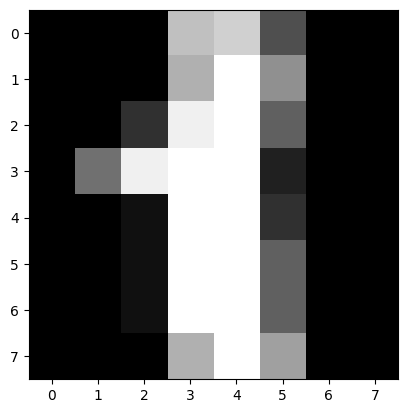

1


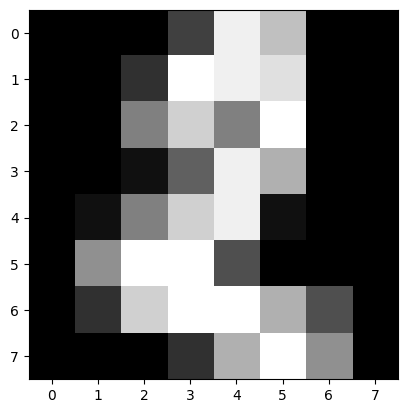

2


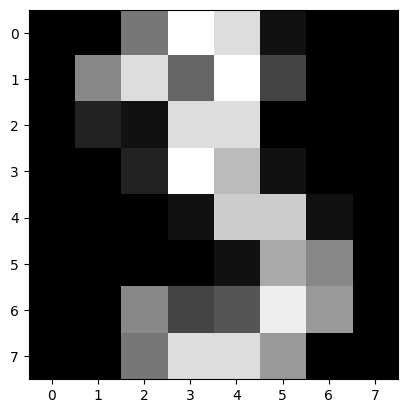

3


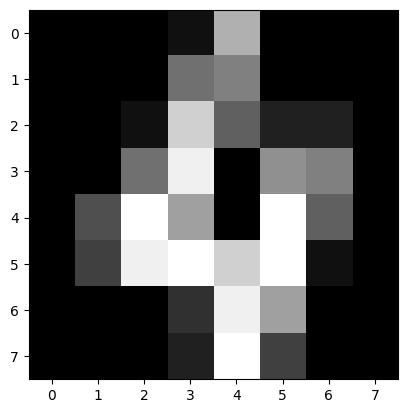

4


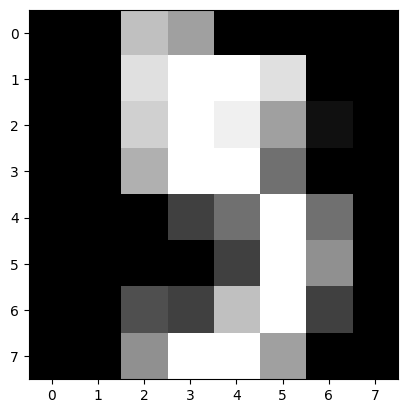

5


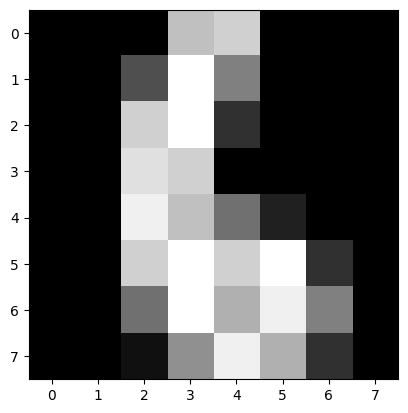

6


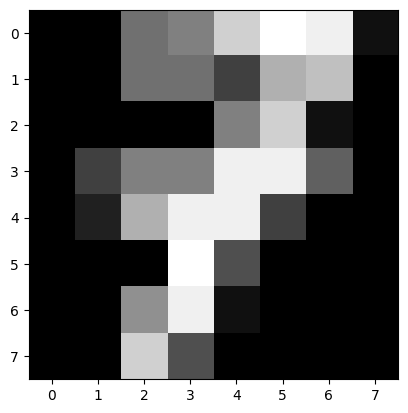

7


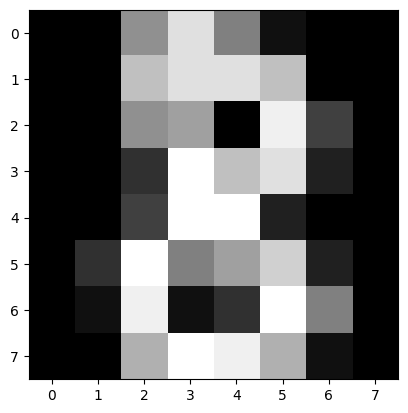

8


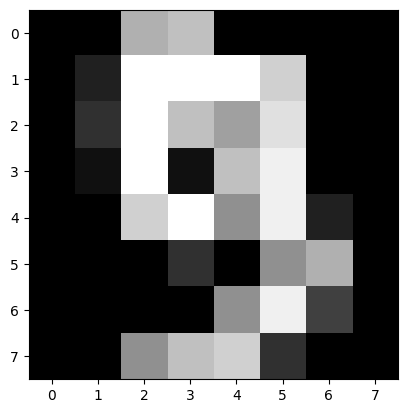

9


/var/folders/n9/3r6hrp015t9d1n6m8l36t0yh0000gn/T/ipykernel_52243/3011978203.py:22: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:233.)
  train_X = [torch.tensor([x]) for x in train_X]


In [16]:
# your code here


### Assingment 3.2
rubric={accuracy:7, quality:1}

Next, we'll define a `DigitClassifier` class which represents a multi-layer perceptron. This perceptron should have take 64-dimensional vectors as input (these represent the 8x8 grayscale images that we just loaded). The model will then classify the input vector into one of 10 possible digit labels (0 to 9). 

The model will take a 1 x 64 tensor as input and produce a 1 x 10 tensor as output. The layers of the model are the following (in order from input to output) `64` $\rightarrow$ `10`:

1. Linear layer 1 containing 20 neurons `nn.Linear(64, 20)`
1. Relu non-linearity 1                 `nn.ReLu()`
1. Linear layer 2 containing 20 neurons 
1. Relu non-linearity 2
1. Linear layer 3 containing 10 neurons 
1. Softmax layer

Implement the `DigitClassifier` class as a subclass of `torch.nn.Module`. You will need to implement both the `__init__` and `forward` method.

Additionally, implement a test which checks that the input (`t_in (1,64)`) and output (`t_out (1,10)` ) dimension of the class are correct and that the output is a probability distribution.

(Hint: The [`item`](https://pytorch.org/docs/stable/generated/torch.Tensor.item.html) member function can be useful here. The sum of the probabilities in the model output might not be exactly 1, but it should be very close)

In [9]:
# your code here

    
# TEST

print(t_out)
print(t_out.sum())
print(t_out.sum().item())
assert(abs(t_out.sum().item() - 1) < 0.00001)

tensor([[0.0860, 0.0883, 0.0986, 0.1166, 0.1000, 0.0969, 0.0966, 0.1026, 0.0947,
         0.1197]], grad_fn=<SoftmaxBackward0>)
tensor(1., grad_fn=<SumBackward0>)
1.0


### Assignment 3.3
rubric={accuracy:3,quality:1}

You are given the following function for model training. Don't worry if you don't understand it yet, we will talk about model training next week.  

In [18]:
def train(model, train_X, train_y, dev_X, dev_y,epochs,quiet=False):
    loss_function = nn.NLLLoss()
    sgd = torch.optim.SGD(model.parameters(), lr=0.001)
    for epoch in range(epochs):
        tot_loss = 0
        for x, y in zip(train_X, train_y):
            model.zero_grad()
            sys_y = model(x).log()
            loss = loss_function(sys_y, torch.tensor([y]))
            loss.backward()
            sgd.step()
            tot_loss += loss
        if not quiet:
            print(f"Epoch {epoch+1} loss: {tot_loss/len(train_y)}")

Initialize a `DigitClassifier` object and use the `train` function to train it for `20` epochs. The function prints a loss every epoch, it should generally decrease through training (though it can jump up and down a bit).

At the end of training, your loss should be clearly < 1. If your loss remains at a higher level, there is probably something wrong with your `DigitClassifier` impelementation.

Epoch 1 loss: 1.6417761495977028
Epoch 2 loss: 0.6085767373892348
Epoch 3 loss: 0.3124294191478744
Epoch 4 loss: 0.21110985982443298
Epoch 5 loss: 0.16215794721701715
Epoch 6 loss: 0.13250300901097936
Epoch 7 loss: 0.11159877388076307
Epoch 8 loss: 0.09526516402351504
Epoch 9 loss: 0.08364483098386552
Epoch 10 loss: 0.07359422663429814
Epoch 11 loss: 0.06493279200273948
Epoch 12 loss: 0.05873458770274056
Epoch 13 loss: 0.05227344911786918
Epoch 14 loss: 0.04679762443893968
Epoch 15 loss: 0.042597737032525666
Epoch 16 loss: 0.03857533361248277
Epoch 17 loss: 0.03513576757364881
Epoch 18 loss: 0.03202134146733514
Epoch 19 loss: 0.029512470073989425
Epoch 20 loss: 0.02739978154288312


You should now implement a `classify (data, model)` function. It takes two arguments:

1. `data` a list of 1 x 64 dimensional tensors, and
1. `model` a `DigitClassifier` object. 

The function classifies the examples in `data` using `model` and returns a list of class labels, that is, numbers between 0 and 9.

** `model(x)`'s output where `x` is the current instance of data: 
```
tensor([[0.0860, 0.0883, 0.0986, 0.1166, 0.1000, 0.0969, 0.0966, 0.1026, 0.0947,
         0.1197]], grad_fn=<SoftmaxBackward0>)
```

You need `argmax()` to find a result


Note: You should return a list of numbers, not a list of torch tensors.

In [20]:
# your code here


Next, implement a function `get_acc` which takes two arguments:

1. `y` a list of system predictions generated by `classify`, and
1. `gold_y` a list of gold standard correct labels.

Your function should compute the accuracy of the predictions in `y` with regard to the gold standard labels in `gold_y`. You can either do this yourself or utilize the function [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) from sklearn.

Finally, classify `dev_X` using your digit classifier and evaluate the accuracy with regard to `dev_y`. You accruacy should be > 90%. Otherwise, something is wrong. 

0.9375


### Assignment 3.4
rubric={accuracy:3}

Pytorch offers a convenient shorthand [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) for defining MLPs and other straightforward neural architectures. Use `nn.Sequential` to create an equivalent model tou your `DigitClassifier` class. 

Use the `train` function to train the sequential model. Then use your `classify` and `get_acc` functions to make sure that the classification accuracy of the `nn.Sequential` model is on par with your custom-made `DigitClassifier` model (on the development set). 

In [23]:
seq_model = nn.Sequential(...)

Epoch 1 loss: 1.7609065214428117
Epoch 2 loss: 0.7148267512396365
Epoch 3 loss: 0.34380507218704875
Epoch 4 loss: 0.217940583533648
Epoch 5 loss: 0.1613649322324957
Epoch 6 loss: 0.1317404998996496
Epoch 7 loss: 0.11294865550014845
Epoch 8 loss: 0.09890905573370935
Epoch 9 loss: 0.08739565857254997
Epoch 10 loss: 0.07734124418181033
Epoch 11 loss: 0.06865681099709102
Epoch 12 loss: 0.060855999689093256
Epoch 13 loss: 0.05403205515539745
Epoch 14 loss: 0.047866399030114914
Epoch 15 loss: 0.042192584281326904
Epoch 16 loss: 0.03701907434721252
Epoch 17 loss: 0.03296354257201128
Epoch 18 loss: 0.02954466785574752
Epoch 19 loss: 0.02724098959315567
Epoch 20 loss: 0.02442263582644243
0.94


## Assignment 4 

In this optional assignment, we'll investigate how the number of neurons affects classification performance. Depending on your computer, it can take a considerable time to run all the experiments for this assignment.

### Assignment 4.1 Optional
rubric={accuracy:5}

In your definition of the `nn.Sequential` and `DigitClassifier` models above, you used hidden layer size 20 in all but the final layer of the network. Let's see what happens when you vary the hidden layer size between 5 and 15. 

For each layer size `n`, train 10 models with different random initialization and evaluate accuracy on the development data. This will give you 10 independent accuracy measurements for every `n`. Store the classification accuracies for each `n` and print out the average accuracy across your ten models for each `n`.

Perform a statistical significance test to measure whether the accuracy of the models for `n == 15` is statistically different from the accuracy for `n == 5` at the 99% significance level. You are free to choose the significance test (e.g. t-test would be an appropriate choice). 


- `scipy.stats.ttest_ind(a,b)` calculates the T-test for the means of two independent samples (`a` and `b`) of scores: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html



```

5: 0.681
6: 0.81325
7: 0.867
8: 0.8887499999999999
9: 0.90625
10: 0.90075
11: 0.91875
12: 0.924
13: 0.9349999999999998
14: 0.9194999999999999
15: 0.9369999999999999


In [6]:
from scipy.stats import ttest_ind

# If a p-value reported from a t test is less than 0.05, then that result is said to be statistically significant... 

### Assignment 4.2 Optional
rubric={acuracy:1}

If you train for 50 epochs instead of 20, is the difference between `n==5` and `n==15` significant?

5: 0.8425
15: 0.94725


Ttest_indResult(statistic=-13.127266175517413, pvalue=1.1737998426732803e-10)